### References
https://github.com/igor-sokolov/dataminingcapstone/blob/master/Capstone%20project%202.ipynb
https://github.com/l0neJT/uoi-coursera-data-mining/blob/master/capstone/task02-cuisine-map.ipynb
https://github.com/ducthienbui97/DataMiningCapstone/tree/master/Notebooks
https://pandas.pydata.org/docs/reference/api
https://gemini.google.com/

In [91]:
!wget https://d396qusza40orc.cloudfront.net/dataminingcapstone/YelpDataset/yelp_dataset.tar.gz
!tar -xvf /kaggle/working/yelp_dataset.tar.gz

--2024-03-18 14:08:57--  https://d396qusza40orc.cloudfront.net/dataminingcapstone/YelpDataset/yelp_dataset.tar.gz
Resolving d396qusza40orc.cloudfront.net (d396qusza40orc.cloudfront.net)... 52.84.160.76, 52.84.160.182, 52.84.160.90, ...
Connecting to d396qusza40orc.cloudfront.net (d396qusza40orc.cloudfront.net)|52.84.160.76|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 443445047 (423M) [application/x-gzip]
Saving to: 'yelp_dataset.tar.gz.1'

yelp_dataset.tar.gz 100%[===================>] 422.90M  84.3MB/s    in 5.0s    

2024-03-18 14:09:02 (84.3 MB/s) - 'yelp_dataset.tar.gz.1' saved [443445047/443445047]

yelp_dataset_challenge_academic_dataset/
yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_user.json
yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_review.json
yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_checkin.json
yelp_dataset_challenge_academic_dataset/Dataset_Challenge_Academic_Dataset_Agreement.pdf
yelp_dat

In [92]:
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics.pairwise import cosine_similarity

In [93]:
uri = '/kaggle/working/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.json'
business_df = pd.read_json(uri, lines=True)


In [94]:
# restaurant_df
restaurant_df = business_df[business_df['categories'].apply(lambda cat: "Restaurants" in cat)]


In [95]:
# cuisine_df
restaurant_df.categories.apply(lambda cats: cats.remove("Restaurants"))

1        None
2        None
3        None
4        None
8        None
         ... 
42144    None
42145    None
42146    None
42148    None
42151    None
Name: categories, Length: 14303, dtype: object

In [96]:
# extract business_id & cat to cuisine_df
cuisine_df = restaurant_df[['business_id', 'categories']]
cuisine_df.head()

,business_id,categories
1,JwUE5GmEO-sH1FuwJgKBlQ,[]
2,uGykseHzyS5xAMWoN6YUqA,[American (Traditional)]
3,LRKJF43s9-3jG9Lgx4zODg,"[Food, Ice Cream & Frozen Yogurt, Fast Food]"
4,RgDg-k9S5YD_BaxMckifkg,[Chinese]
8,rdAdANPNOcvUtoFgcaY9KA,[American (Traditional)]


## Select top 50 catogories

In [97]:
top_cuisines_df = cuisine_df['categories'].explode().value_counts().sort_values(ascending=False).reset_index(name='count').nlargest(30, 'count')
top_cuisines_df.head()

,categories,count
0,Mexican,1749
1,American (Traditional),1508
2,Fast Food,1488
3,Pizza,1449
4,Sandwiches,1336


## Reviews_data

In [98]:
REVIEW_SOURCE = "/kaggle/working/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_review.json"
# with open(REVIEW_SOURCE) as f:
#     reviews_df = pd.DataFrame(json.loads(l) for l in f)
reviews_df = pd.read_json(REVIEW_SOURCE, lines=True)
reviews_df.head()

,votes,user_id,review_id,stars,date,text,type,business_id
0,"{'funny': 0, 'useful': 2, 'cool': 1}",Xqd0DzHaiyRqVH3WRG7hzg,15SdjuK7DmYqUAj6rjGowg,5,2007-05-17,dr. goldberg offers everything i look for in a...,review,vcNAWiLM4dR7D2nwwJ7nCA
1,"{'funny': 0, 'useful': 2, 'cool': 0}",H1kH6QZV7Le4zqTRNxoZow,RF6UnRTtG7tWMcrO2GEoAg,2,2010-03-22,"Unfortunately, the frustration of being Dr. Go...",review,vcNAWiLM4dR7D2nwwJ7nCA
2,"{'funny': 0, 'useful': 1, 'cool': 1}",zvJCcrpm2yOZrxKffwGQLA,-TsVN230RCkLYKBeLsuz7A,4,2012-02-14,Dr. Goldberg has been my doctor for years and ...,review,vcNAWiLM4dR7D2nwwJ7nCA
3,"{'funny': 0, 'useful': 0, 'cool': 0}",KBLW4wJA_fwoWmMhiHRVOA,dNocEAyUucjT371NNND41Q,4,2012-03-02,Been going to Dr. Goldberg for over 10 years. ...,review,vcNAWiLM4dR7D2nwwJ7nCA
4,"{'funny': 0, 'useful': 2, 'cool': 1}",zvJCcrpm2yOZrxKffwGQLA,ebcN2aqmNUuYNoyvQErgnA,4,2012-05-15,Got a letter in the mail last week that said D...,review,vcNAWiLM4dR7D2nwwJ7nCA


In [99]:
reviews_df = reviews_df.sample(frac=0.1)

In [100]:
cui_rev_df = cuisine_df.merge(reviews_df, on='business_id')


In [101]:
cui_rev_df = cui_rev_df[['business_id', 'text', 'categories']]

In [102]:
cui_rev_df.set_index('business_id')


,text,categories
business_id,,
JwUE5GmEO-sH1FuwJgKBlQ,This is definitely not your usual truck stop. ...,[]
JwUE5GmEO-sH1FuwJgKBlQ,Great truck stop restaurant. I've had breakfa...,[]
rdAdANPNOcvUtoFgcaY9KA,Under ordinary circumstances I'm not a breakfa...,[American (Traditional)]
rdAdANPNOcvUtoFgcaY9KA,Friday Night Fish Fry! reasonable prices and g...,[American (Traditional)]
rdAdANPNOcvUtoFgcaY9KA,The man and I are on this thing now where we a...,[American (Traditional)]
...,...,...
ZpB2O-WAbbRHdP0V8GrwXA,Love this place! Food is fresh with flavor. ...,[American (New)]
ZpB2O-WAbbRHdP0V8GrwXA,Delicious healthy food. I tried the baked chi...,[American (New)]
ZpB2O-WAbbRHdP0V8GrwXA,stopped in the minute I spotted the place. fak...,[American (New)]


In [103]:
cui_rev_exploded = cui_rev_df.explode('categories')
cui_rev_exploded.categories.value_counts()

categories
American (New)            9396
Nightlife                 8708
American (Traditional)    8480
Bars                      8239
Mexican                   6980
                          ... 
Bangladeshi                  1
Gay Bars                     1
Poutineries                  1
Gas & Service Stations       1
Country Dance Halls          1
Name: count, Length: 219, dtype: int64

In [104]:
cui_rev_exploded = cui_rev_exploded.dropna(subset=['categories'])
cui_rev_exploded.head()

,business_id,text,categories
2,rdAdANPNOcvUtoFgcaY9KA,Under ordinary circumstances I'm not a breakfa...,American (Traditional)
3,rdAdANPNOcvUtoFgcaY9KA,Friday Night Fish Fry! reasonable prices and g...,American (Traditional)
4,rdAdANPNOcvUtoFgcaY9KA,The man and I are on this thing now where we a...,American (Traditional)
5,_wZTYYL7cutanzAnJUTGMA,I really wanted to like this place but it wasn...,Bars
5,_wZTYYL7cutanzAnJUTGMA,I really wanted to like this place but it wasn...,American (Traditional)


In [105]:
merged_df = top_cuisines_df.merge(cui_rev_exploded, how='left', on='categories')


### group by categories and text

In [106]:
merged_df['combined_text'] = merged_df.groupby('categories')['text'].transform(lambda x: ', '.join(x.dropna()))
merged_df.drop_duplicates(subset=['categories'], inplace=True)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 116064
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   categories     30 non-null     object
 1   count          30 non-null     int64 
 2   business_id    30 non-null     object
 3   text           30 non-null     object
 4   combined_text  30 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.4+ KB


In [107]:
top_merged_df = merged_df.sort_values(by='count', ascending=False).head(10)

In [108]:
top_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 60359
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   categories     10 non-null     object
 1   count          10 non-null     int64 
 2   business_id    10 non-null     object
 3   text           10 non-null     object
 4   combined_text  10 non-null     object
dtypes: int64(1), object(4)
memory usage: 480.0+ bytes


In [109]:
combined_text_lst = top_merged_df['combined_text'].tolist()

## Computing similarities

In [110]:
# helper func
def mx2corr(mx):
    df = pd.DataFrame(mx, columns=merged_df['categories'].tolist())

    return df.corr()


In [129]:

# cnt_vectorizer = CountVectorizer(stop_words='english')
# idf_vectorizer = TfidfVectorizer(stop_words='english')

# cnt_mx = cnt_vectorizer.fit_transform(combined_text_lst)
# idf_mx = idf_vectorizer.fit_transform(combined_text_lst)


# cnt_cos = cosine_similarity(cnt_mx, cnt_mx)
# idf_cos = cosine_similarity(idf_mx, idf_mx)

cnt_cos_df = pd.DataFrame(cnt_cos, columns=top_merged_df['categories'], index=top_merged_df['categories'])
idf_cos_df = pd.DataFrame(idf_cos, columns=top_merged_df['categories'], index=top_merged_df['categories'])

<Axes: xlabel='categories', ylabel='categories'>

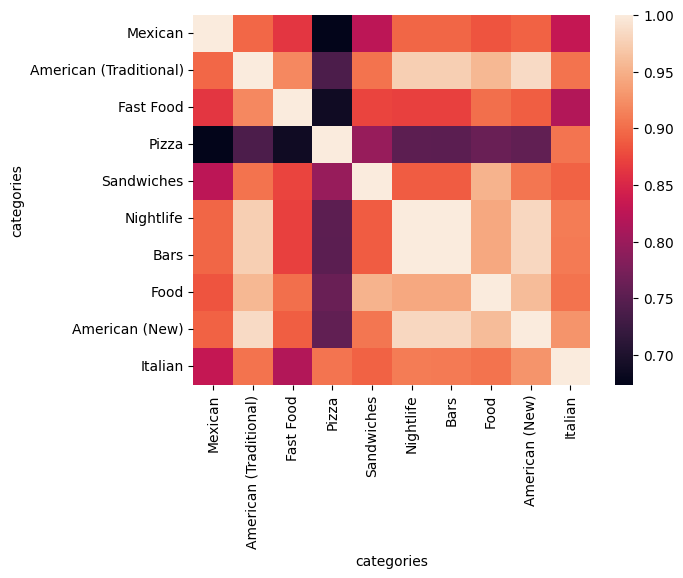

In [130]:
sns.heatmap(cnt_cos_df)

<Axes: xlabel='categories', ylabel='categories'>

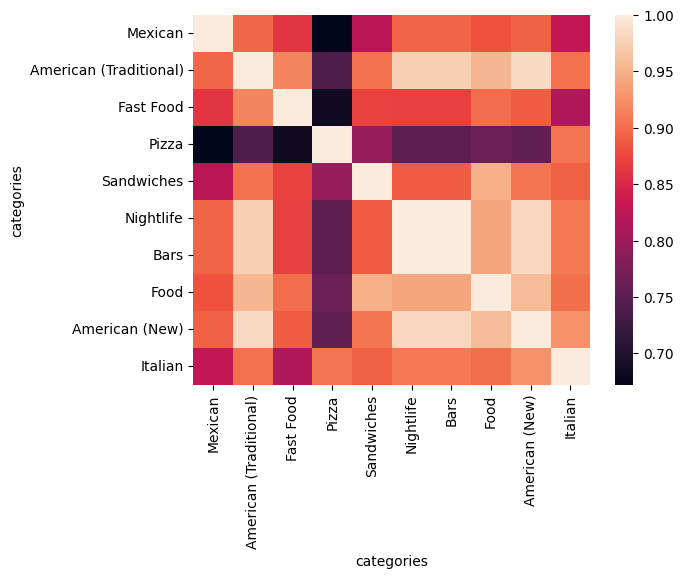

In [131]:
sns.heatmap(idf_cos_df)

## Findings:
+ easy to find the most similar item.
+ difficult to compare tf-idf and idf features,
+ difficult to cluster.

## K-mean to cluster

https://datascience.stackexchange.com/questions/87792/how-do-i-calculate-distance-of-test-data-point-from-centroids-in-kmeans-scikit-l

+ make the distance between data point and the centroid point of the second point as the similarity 

In [114]:
# k-mean
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances

cnt_kmeans = KMeans(n_clusters=2, random_state=1875, n_init="auto").fit(cnt_mx)
idf_kmeans = KMeans(n_clusters=2, random_state=1875, n_init="auto").fit(idf_mx)



In [115]:
cnt_labs = cnt_kmeans.labels_
idf_labs = idf_kmeans.labels_

cnt_centroids = cnt_kmeans.cluster_centers_
idf_centroids = idf_kmeans.cluster_centers_



In [116]:
top_merged_df['cnt_labels'] = cnt_labs
top_merged_df['idf_labels'] = idf_labs

In [117]:
cnt_centroids_df = pd.DataFrame(cnt_centroids).T
cnt_centroids_df.columns = ['cluster 0', 'cluster 1']
cnt_centroids_df.head()

,cluster 0,cluster 1
0,88.0,184.8
1,4.8,11.6
2,0.2,0.0
3,0.0,0.2
4,0.2,0.2


In [118]:
cnt_centroids_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48366 entries, 0 to 48365
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cluster 0  48366 non-null  float64
 1   cluster 1  48366 non-null  float64
dtypes: float64(2)
memory usage: 755.8 KB


In [119]:
cnt_centroids_df['cluster 1'].head()

0    184.8
1     11.6
2      0.0
3      0.2
4      0.2
Name: cluster 1, dtype: float64

In [120]:
top_merged_df['cnt_centroids'] = top_merged_df['cnt_labels'].apply(
    lambda x: cnt_centroids_df['cluster 1'].values if x else cnt_centroids_df['cluster 0'].values
)

top_merged_df['idf_centroids'] = top_merged_df['idf_labels'].apply(
    lambda x: cnt_centroids_df['cluster 1'].values if x else cnt_centroids_df['cluster 0'].values
)

In [121]:
top_merged_df.head()

,categories,count,business_id,text,combined_text,cnt_labels,idf_labels,cnt_centroids,idf_centroids
0,Mexican,1749,77ESrCo7hQ96VpCWWdvoxg,I joined a few coworkers for lunch here today....,I joined a few coworkers for lunch here today....,1,1,"[184.8, 11.600000000000001, 0.0, 0.2, 0.2, 5.2...","[184.8, 11.600000000000001, 0.0, 0.2, 0.2, 5.2..."
6980,American (Traditional),1508,rdAdANPNOcvUtoFgcaY9KA,Under ordinary circumstances I'm not a breakfa...,Under ordinary circumstances I'm not a breakfa...,1,1,"[184.8, 11.600000000000001, 0.0, 0.2, 0.2, 5.2...","[184.8, 11.600000000000001, 0.0, 0.2, 0.2, 5.2..."
15460,Fast Food,1488,KFJ1jBfFkRfyn3AoAUl3YQ,The Middleton Hardee's just renovated. They g...,The Middleton Hardee's just renovated. They g...,0,0,"[88.0, 4.800000000000001, 0.2, 0.0, 0.2, 3.400...","[88.0, 4.800000000000001, 0.2, 0.0, 0.2, 3.400..."
17711,Pizza,1449,zOc8lbjViUZajbY7M0aUCQ,"We went there for the first time yesterday, an...","We went there for the first time yesterday, an...",0,1,"[88.0, 4.800000000000001, 0.2, 0.0, 0.2, 3.400...","[184.8, 11.600000000000001, 0.0, 0.2, 0.2, 5.2..."
23471,Sandwiches,1336,cpGv6ES2hzPCtCUQgipwXw,A Madison institution for all the right reason...,A Madison institution for all the right reason...,0,1,"[88.0, 4.800000000000001, 0.2, 0.0, 0.2, 3.400...","[184.8, 11.600000000000001, 0.0, 0.2, 0.2, 5.2..."


In [122]:
import numpy as np

In [123]:
cnt_centroids_lst = top_merged_df['cnt_centroids'].tolist()
idf_centroids_lst = top_merged_df['idf_centroids'].tolist()


In [124]:
cnt_centroids_mx = np.stack(cnt_centroids_lst)
idf_centroids_mx = np.stack(idf_centroids_lst)


<Axes: xlabel='categories', ylabel='categories'>

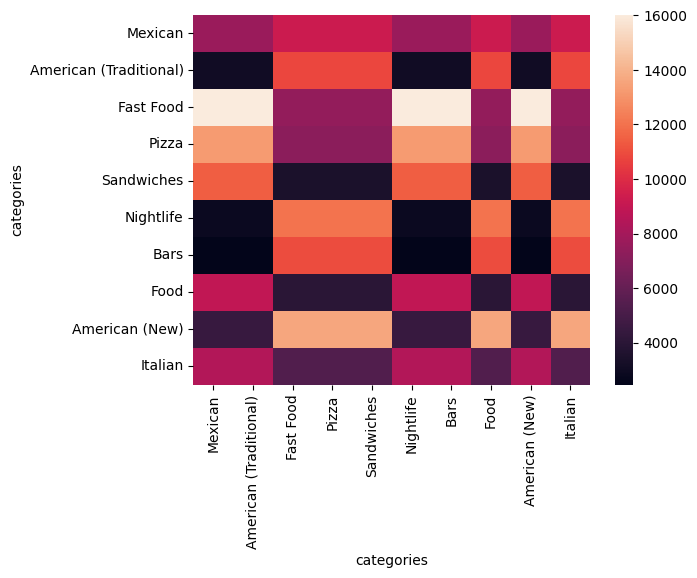

In [125]:
from sklearn.metrics.pairwise import euclidean_distances

dis2centroid_df = pd.DataFrame(euclidean_distances(cnt_mx, cnt_centroids_mx), \
                               columns = top_merged_df['categories'], \
                               index=top_merged_df['categories']).T

sns.heatmap(dis2centroid_df.T)

<Axes: xlabel='categories', ylabel='categories'>

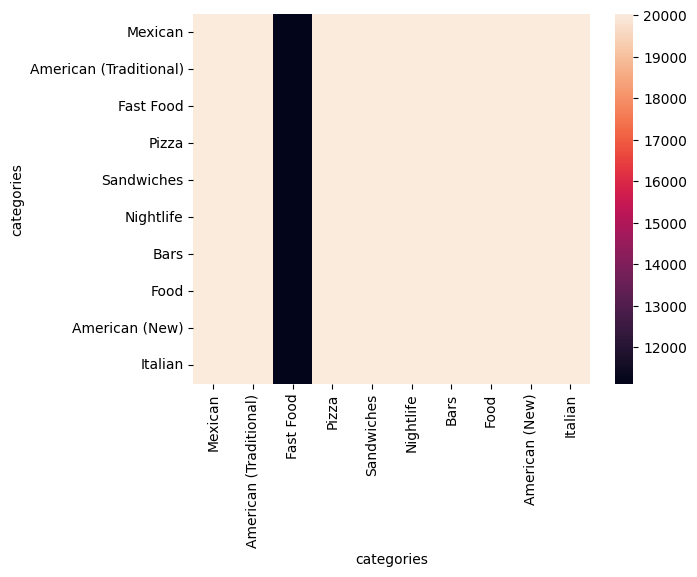

In [126]:
dis2centroid_df = pd.DataFrame(euclidean_distances(idf_mx, idf_centroids_mx), \
                               columns = top_merged_df['categories'], \
                               index=top_merged_df['categories']).T

sns.heatmap(dis2centroid_df.T)

### Findings:
+ A error occursed --> few dataset.
+ easy to cluster with tf features.